#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [1]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('/content/Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [2]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [4]:
num_rows, num_columns = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 148654
Number of columns: 13


In [5]:
data_types = df.dtypes
missing_values = df.isnull().sum()
print("Data Types:")
print(data_types)
print("\nMissing Values:")
print(missing_values)

Data Types:
Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

Missing Values:
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


In [6]:
basic_stats = df.describe()
print("Basic Statistics:")
print(basic_stats)

Basic Statistics:
                  Id        BasePay    OvertimePay       OtherPay  \
count  148654.000000  148045.000000  148650.000000  148650.000000   
mean    74327.500000   66325.448840    5066.059886    3648.767297   
std     42912.857795   42764.635495   11454.380559    8056.601866   
min         1.000000    -166.010000      -0.010000   -7058.590000   
25%     37164.250000   33588.200000       0.000000       0.000000   
50%     74327.500000   65007.450000       0.000000     811.270000   
75%    111490.750000   94691.050000    4658.175000    4236.065000   
max    148654.000000  319275.010000  245131.880000  400184.250000   

            Benefits       TotalPay  TotalPayBenefits           Year  Notes  \
count  112491.000000  148654.000000     148654.000000  148654.000000    0.0   
mean    25007.893151   74768.321972      93692.554811    2012.522643    NaN   
std     15402.215858   50517.005274      62793.533483       1.117538    NaN   
min       -33.890000    -618.130000       -6

In [8]:
df['TotalPay'].fillna(df['TotalPay'].mean(), inplace=True)

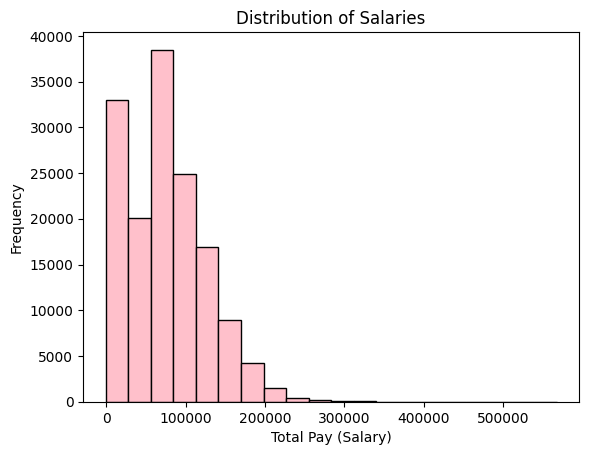

In [17]:
import matplotlib.pyplot as plt
plt.hist(df['TotalPay'], bins=20, color='pink', edgecolor='black')
plt.xlabel('Total Pay (Salary)')
plt.ylabel('Frequency')
plt.title('Distribution of Salaries')
plt.show()

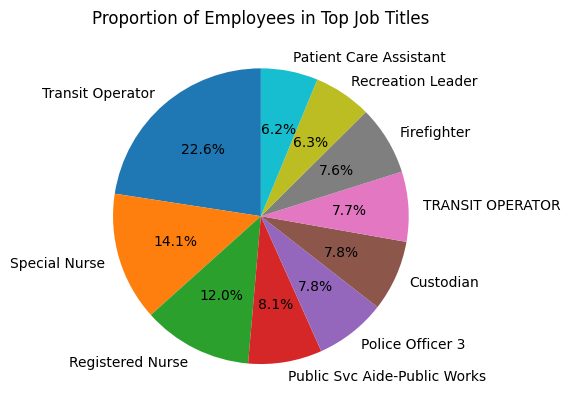

In [18]:
department_counts = df['JobTitle'].value_counts()
top_n = 10
top_departments = department_counts.head(top_n)
plt.pie(top_departments, labels=top_departments.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Employees in Top Job Titles')
plt.show()

In [20]:
grouped_data = df.groupby('JobTitle')['TotalPay'].agg(['mean', 'median', 'min', 'max', 'std', 'count'])
print("Summary Statistics for TotalPay, Grouped by JobTitle:")
print(grouped_data)

Summary Statistics for TotalPay, Grouped by JobTitle:
                                                        mean     median  \
JobTitle                                                                  
ACCOUNT CLERK                                   44035.664337  49777.820   
ACCOUNTANT                                      47429.268000  60076.240   
ACCOUNTANT INTERN                               29031.742917  17658.505   
ACPO,JuvP, Juv Prob (SFERS)                     62290.780000  62290.780   
ACUPUNCTURIST                                   67594.400000  67594.400   
...                                                      ...        ...   
X-RAY LABORATORY AIDE                           52705.880385  60333.125   
X-Ray Laboratory Aide                           50823.942700  60047.290   
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS  53632.870000  53632.870   
Youth Comm Advisor                              41414.307500  44449.895   
ZOO CURATOR                                   

In [22]:
correlation = df['TotalPay'].corr(df['BasePay'])
print(f"Correlation between TotalPay and BasePay: {correlation}")

Correlation between TotalPay and BasePay: 0.9544936474296023


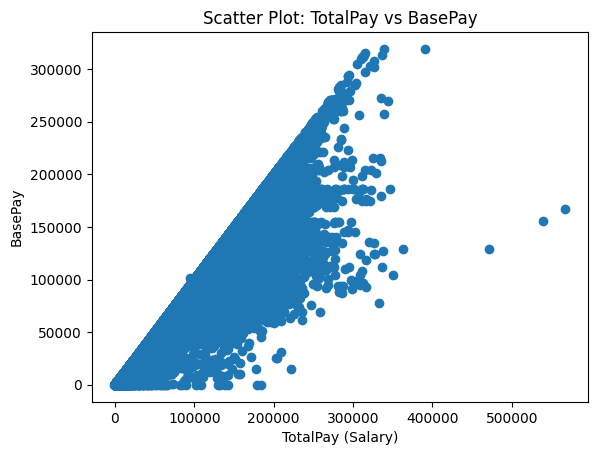

In [24]:
plt.scatter(df['TotalPay'], df['BasePay'])
plt.xlabel('TotalPay (Salary)')
plt.ylabel('BasePay')
plt.title('Scatter Plot: TotalPay vs BasePay')
plt.show()

# Good Luck!